In [33]:
#########################################################################
# Purpose: Exploting the methods to query visibilities from 
#          the ASKAPsoft imager
#
# Author: G. Wong (g.wong@csiro.au)
# Date: 08.10.19
#
# Execution: run via jupyter notebook
#
# Notes: You will need to have casacore installed and its dependancies.
#        Two methods, extract data via index tables or use TaQL
# 
# Reference note: 
#  TaQL https://casacore.github.io/casacore-notes/199.html
#  python-casacore https://casacore.github.io/python-casacore/casacore_images.html
# 
#  Update
#  24/02/20 - included some TaQL tests 
#########################################################################

In [34]:
import unittest
from casacore.images import *
import numpy
import cmath
import tempfile
import os
import matplotlib.pyplot as plt
%matplotlib inline
try:
    import numpy.ma as nma
except ImportError:
    import numpy.core.ma as nma

In [35]:
# Using casacores image function for data exploration
filename="/Users/won10d/Documents/DINGO/development/askapSoft_protoData/cubes-cycle-1/grid.wr.1.spec"
im=image(filename)

In [36]:
print(im.attrgroupnames())   # The sample showed no group names

imdata=im.getdata()          # Get image data and mask.
narray = numpy.array(imdata) # should be a numpy array but I had to convert it
print(narray.shape)          # The order (I think) channel, polarisation, U, V 

[]
(3, 4, 128, 128)


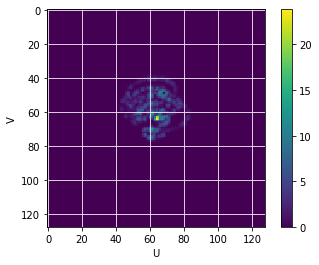

In [37]:
# Plot the index
to_plot=abs(narray[0,0])
fig = plt.figure()
fig.add_subplot(111)
plt.imshow(to_plot)
plt.xlabel('U')
plt.ylabel('V')
plt.grid(color='white', ls='solid')
plt.colorbar()
plt.show()

In [38]:
# Using casacores table function for data exploration
import casacore.tables as pt

tab=pt.table(filename)
print('\n\nTable Info:\n',tab,)
print('\n\nNumber of Columns:',tab.ncols(),'\nNumber of Rows:',tab.nrows())

Successful readonly open of default-locked table /Users/won10d/Documents/DINGO/development/askapSoft_protoData/cubes-cycle-1/grid.wr.1.spec: 1 columns, 1 rows


Table Info:
 Table: /Users/won10d/Documents/DINGO/development/askapSoft_protoData/cubes-cycle-1/grid.wr.1.spec
1 rows
1 columns: map


Number of Columns: 1 
Number of Rows: 1


In [39]:
# print(tab)                       # dirty way to find the column names
coldata = tab.getcol('map')        # if you just want the column information
print(coldata[0][0][0][0])


[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [32]:
# Using TaQL
tab = pt.table('cubes-cycle-1/test.spec')
# t1 = pt.taql('show table $tab')      # show table test.spec
# print(t1[0])

# Inserting information into the data
# t1 = pt.taql('ALTER TABLE test.spec ADD COLUMN test STRING')
# t1 = pt.taql('INSERT INTO test.spec (test) VALUES (''blah'') ')
# t1 = pt.taql('ALTER TABLE test.spec SET KEYWORD metadata2 = testing1 AS string')

# Select statement
t1 = pt.taql('Select map from $tab')      # show table test.spec
print(t1[0])

Successful readonly open of default-locked table cubes-cycle-1/test.spec: 2 columns, 6 rows
{'map': array([[[[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         ...,
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],

        [[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         ...,
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],

        [[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, ..